<a href="https://colab.research.google.com/github/AvigdorFeldman/Collab/blob/main/Tirgul6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import requests
from bs4 import BeautifulSoup

def fetch_page(url):
  headers = {
      'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
  }
  response = requests.get(url, headers=headers)
  if response.status_code == 200:
    soup = BeautifulSoup(response.text, 'html.parser')
    return soup
  else:
    print(f'Error: Unable to fetch page. Status code: {response.status_code}')
    return None

In [18]:
import re

def index_words(soup):
    index = {}
    words = re.findall(r'\w+', soup.get_text())
    for word in words:
        word = word.lower()
        if word in index:
            index[word] += 1
        else:
            index[word] = 1
    return index



In [19]:
def remove_stop_words(index):
    stop_words = {'a', 'an', 'the', 'and', 'or', 'in', 'on', 'at'}
    for stop_word in stop_words:
        if stop_word in index:
            del index[stop_word]
    return index


In [20]:
from nltk.stem import PorterStemmer

def apply_stemming(index):
    stemmer = PorterStemmer()
    stemmed_index = {}
    for word, count in index.items():
        stemmed_word = stemmer.stem(word)
        if stemmed_word in stemmed_index:
            stemmed_index[stemmed_word] += count
        else:
            stemmed_index[stemmed_word] = count
    return stemmed_index


In [21]:
url = 'https://en.wikipedia.org/wiki/Plant_pathology'
soup = fetch_page(url)

if soup:
    print(f"Successfully fetched page: {url}")
else:
    print(f"Failed to fetch page: {url}")

Successfully fetched page: https://en.wikipedia.org/wiki/Plant_pathology


In [22]:
word_index = index_words(soup)
word_index = remove_stop_words(word_index)
word_index = apply_stemming(word_index)

print("Sample of processed word index:")
# Print the first 10 items or fewer if the index is smaller
for i, (word, count) in enumerate(word_index.items()):
    if i >= 10:
        break
    print(f"'{word}': {count}")


Sample of processed word index:
'plant': 107
'patholog': 25
'wikipedia': 6
'jump': 1
'to': 27
'content': 4
'main': 7
'menu': 2
'move': 4
'sidebar': 4


In [23]:
sorted_word_index = sorted(word_index.items(), key=lambda item: item[1], reverse=True)
top_10_words = dict(sorted_word_index[:10])

print("Top 10 most significant words related to 'Plant Disease Detection' by frequency:")
for word, count in top_10_words.items():
    print(f"'{word}': {count}")

Top 10 most significant words related to 'Plant Disease Detection' by frequency:
'plant': 107
'of': 44
'diseas': 29
'to': 27
'pathogen': 26
'agricultur': 26
'patholog': 25
'farm': 20
'for': 18
'edit': 14


In [24]:
!pip install firebase

In [25]:
from firebase import firebase
import os
# חיבור לפיירבייס
FBconn = firebase.FirebaseApplication(
    'https://tirgul5-7c2cf-default-rtdb.firebaseio.com/',
    None
)

In [26]:
FBconn.put('/','plant_pathology_top_words', top_10_words)

print("Successfully stored top 10 words in Firebase Realtime Database at 'plant_pathology_top_words'.")

Successfully stored top 10 words in Firebase Realtime Database at 'plant_pathology_top_words'.


In [27]:
retrieved_words = FBconn.get('/', 'plant_pathology_top_words')

print("Retrieved data from Firebase:")
print(retrieved_words)

Retrieved data from Firebase:
{'agricultur': 26, 'diseas': 29, 'edit': 14, 'farm': 20, 'for': 18, 'of': 44, 'pathogen': 26, 'patholog': 25, 'plant': 107, 'to': 27}


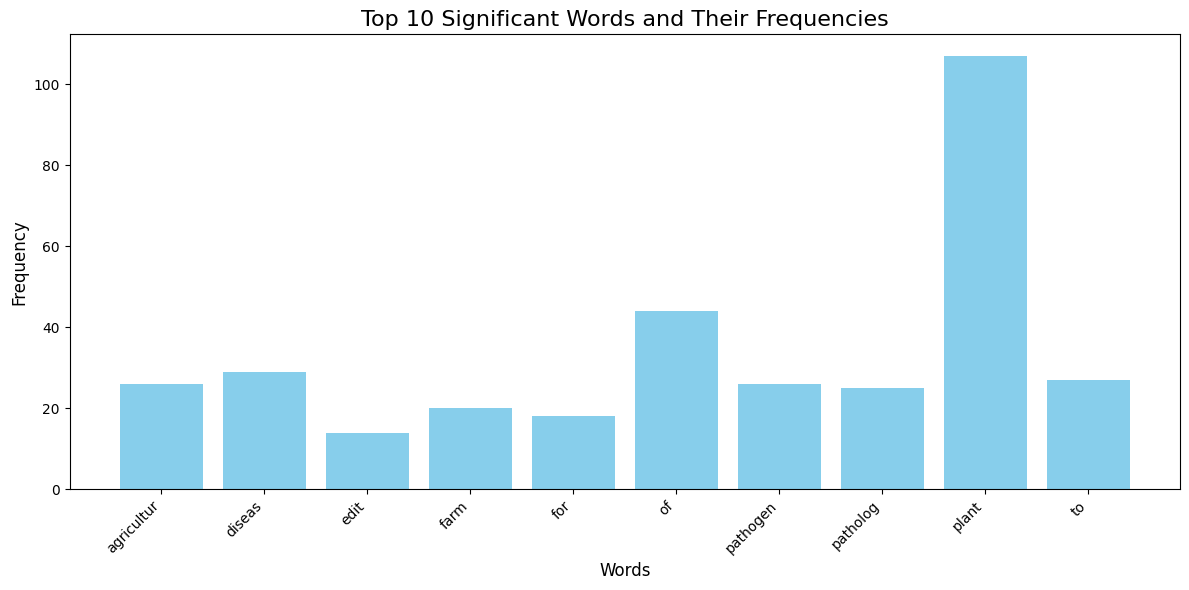

Bar chart displaying the frequencies of the top 10 significant words.


In [28]:
import matplotlib.pyplot as plt

# Extract words and frequencies from the retrieved_words dictionary
words = list(retrieved_words.keys())
frequencies = list(retrieved_words.values())

# Create the bar chart
plt.figure(figsize=(12, 6))
plt.bar(words, frequencies, color='skyblue')

# Add title and labels
plt.title('Top 10 Significant Words and Their Frequencies', fontsize=16)
plt.xlabel('Words', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Ensure layout is tight to prevent labels from overlapping
plt.tight_layout()

# Display the plot
plt.show()

print("Bar chart displaying the frequencies of the top 10 significant words.")